*Gavin Gunawardena* <br />
*Assignment 3* <br />
*INFS 768* <br />
*Dr. Zeng* <br />
*11/19/21*

*Following textbook page 106 ~ 119*
### Part Part 1. Explore NNET models with MLPClassifier

1.	Tuning neural networks (page 110)
Try different numbers of hidden_layer_sizes including the number of hidden layers AND the number of nodes in each layer

In [1]:
#Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display
import mglearn
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

from sklearn.model_selection import train_test_split
%matplotlib inline

Text(0, 0.5, 'Feature 1')

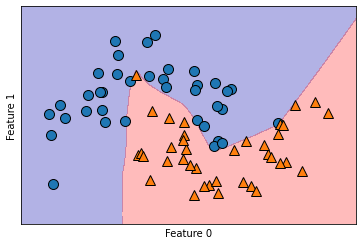

In [2]:
#Tuning nueral networks
#100 hidden layers are used by default
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Adjusting the amount of hidden units from 10 to 60:

Text(0, 0.5, 'Feature 1')

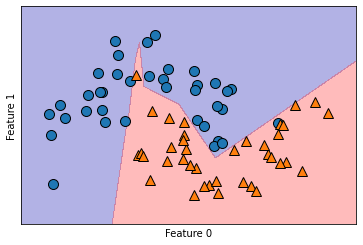

In [3]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10],max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

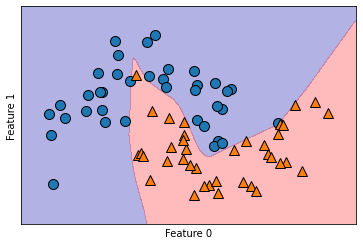

In [4]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[60], max_iter=1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

*The decision boundary becomes more complex as you increase the number of hidden units as shown above.*

Text(0, 0.5, 'Feature 1')

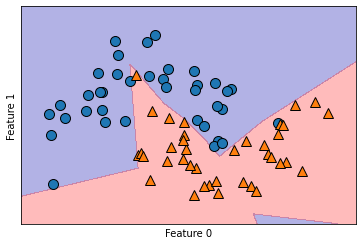

In [5]:
# using two hidden layers, with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10, 10, 10, 10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

*The decision boundary becomes more complex and jagged as you increase the amount of hidden layers from 1 to 2, but further increasing the amount of hidden layers smoothens the decision boundary.*

Text(0, 0.5, 'Feature 1')

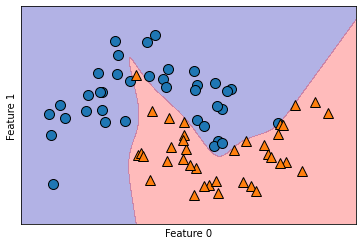

In [6]:
# using two hidden layers, with 10 units each, now with tanh nonlinearity instead of rect activation funtion
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10], max_iter = 1000)
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

*Changing the activation function from rect to tanh makes the decision boundary smoother.*

2.	Discuss the effect of the hidden_layer_sizes on the decision boundary you visualized.
*As mentioned above, increasing the amount of hidden layers seems to smoothen the decision boundary. Increasing the amount of nodes per hidden layer seems to increase the accuracy on the training dataset, complexity, and smoothness of the decision boundary.*

3.	Visualize the effect of alpha (the regularization hyperparameter in NNET)

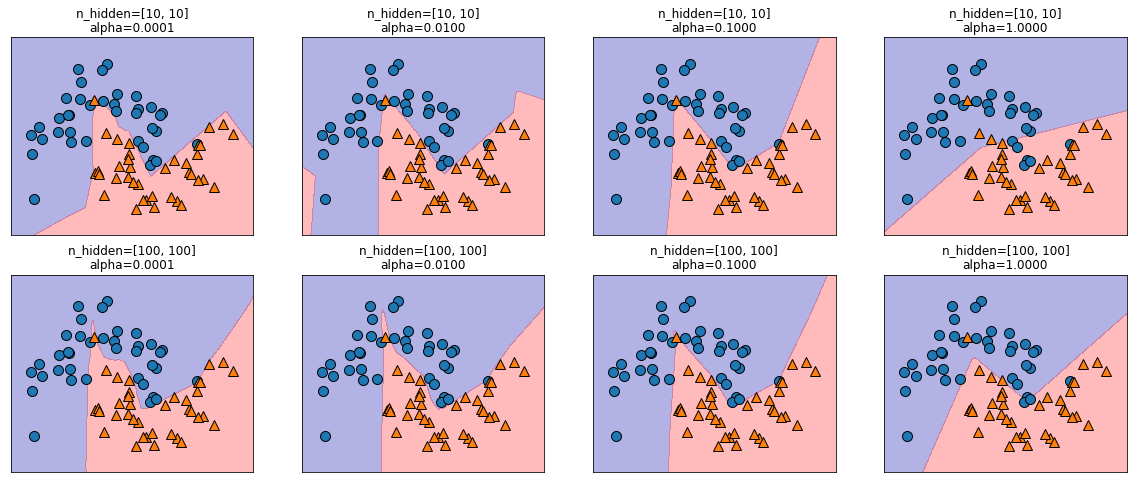

In [7]:
#Changing the values of the hidden units and alpha but keeping the hidden layers the same at 2
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
            alpha=alpha, max_iter = 1000)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
            n_hidden_nodes, n_hidden_nodes, alpha))

4.	Discuss the effect of alpha

*Alpha, as it increases, seems to decrease complexity of the decision boundary, making it more smooth and less accurate on the training dataset.*

### Part 2. Build a NNET model to classify the Breast Cancer Data

1.	(page 116) produce the training and test accuracies with MLPClassifier

In [8]:
#Applying the MLPClassifier to the Breast Cancer dataset to test neural networks
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state=0)
mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.94
Accuracy on test set: 0.92


2.	Use StandardScaler to standardize the data to improve accuracy

In [9]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0, max_iter=1000)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


3.	Fine-tune alpha (2 extra credits)

In [10]:
# compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)
# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0, max_iter=1000, alpha=.8)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.979


*Here, I adjusted the values of alpha from the default of .0001 to get better generalization performance and lower the distance betwen the training set accuracy and test set accuracy. This also decreased the model's complexity but also ended up increasing the accuracy on the test set. After much adjustment, .8 seems to be optimal.*